# Exploratory Data Analysis on Financial Intermediary Funds Funding Decisions Dataset

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pywaffle import Waffle
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

In [2]:
pwd

'C:\\Users\\Sanchit\\Desktop\\financial-intermediary-funds-funding-decisions'

In [5]:
#Reading the dataset in a data frame
#This dataset is taken from the From World Bank Financial Open Data.Financial Intermediary Funds (FIFs) are multilateral financing
#arrangements for which the World Bank provides Trustee services that include committing and transferring funds to project 
#implementers (generally international organizations such as multilateral development banks or UN agencies). In all cases 
#the World Bank as Trustee is required to act in accordance with instructions of independent governing bodies.
#In fulfilling its responsibilities, the World Bank as Trustee complies with all sanctions applicable to World Bank transactions.

#Funding Decisions represent amounts approved by the FIFs governing bodies for projects fees and administrative budgets. 
#Funding to projects can be done through various financial products, including grants and concessional loans.

df = pd.read_csv('financial-intermediary-funds-funding-decisions.csv')

In [6]:
#Displaying the dataset
df

,As of Date,Fund Name,Use Code,Country Beneficiary,Recipient,Sub Account,Approval Quarter,Calendar Year,Amount in USD,Financial Product,Sector/Theme
0,2013-12-31T00:00:00,Global Environment Facility,Project Preparation,Guatemala,UN Development Programme,GF05,OCT-DEC,2011,90909.00,Grant,Environment/Climate Change
1,2013-12-31T00:00:00,Global Environment Facility,Project Supervision Fees,NaN,UN Development Programme,GF05,OCT-DEC,2011,9091.00,NonApplicable,Environment/Climate Change
2,2013-12-31T00:00:00,Global Environment Facility,Project Supervision Fees,NaN,UN Development Programme,GF05,OCT-DEC,2011,50000.00,NonApplicable,Environment/Climate Change
3,2013-12-31T00:00:00,Global Environment Facility,Project Preparation,Russian Federation,UN Development Programme,GF05,OCT-DEC,2011,150000.00,Grant,Environment/Climate Change
4,2013-12-31T00:00:00,Global Environment Facility,Project Supervision Fees,NaN,UN Development Programme,GF05,OCT-DEC,2011,13500.00,NonApplicable,Environment/Climate Change
5,2013-12-31T00:00:00,Global Environment Facility,Projects,Eritrea,UN Development Programme,GF05,OCT-DEC,2011,5878000.00,Grant,Environment/Climate Change
6,2013-12-31T00:00:00,Global Environment Facility,Projects,NaN,UN Environment Programme,GF05,OCT-DEC,2011,6798000.00,Grant,Environment/Climate Change
7,2013-12-31T00:00:00,Global Environment Facility,Projects,China,Food and Agriculture Org of the UN,GF05,OCT-DEC,2011,2607273.00,Grant,Environment/Climate Change
8,2013-12-31T00:00:00,Global Environment Facility,Project Supervision Fees,NaN,Food and Agriculture Org of the UN,GF05,OCT-DEC,2011,260727.00,NonApplicable,Environment/Climate Change
9,2013-12-31T00:00:00,Global Environment Facility,Project Supervision Fees,NaN,UN Development Programme,GF05,OCT-DEC,2011,587800.00,NonApplicable,Environment/Climate Change


In [7]:
#Changing the column names for ease of use
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = [c.replace('/', '_') for c in df.columns]

In [8]:
#Displaying the first 5 rows
df.head()

,As_of_Date,Fund_Name,Use_Code,Country_Beneficiary,Recipient,Sub_Account,Approval_Quarter,Calendar_Year,Amount_in_USD,Financial_Product,Sector_Theme
0,2013-12-31T00:00:00,Global Environment Facility,Project Preparation,Guatemala,UN Development Programme,GF05,OCT-DEC,2011,90909.0,Grant,Environment/Climate Change
1,2013-12-31T00:00:00,Global Environment Facility,Project Supervision Fees,NaN,UN Development Programme,GF05,OCT-DEC,2011,9091.0,NonApplicable,Environment/Climate Change
2,2013-12-31T00:00:00,Global Environment Facility,Project Supervision Fees,NaN,UN Development Programme,GF05,OCT-DEC,2011,50000.0,NonApplicable,Environment/Climate Change
3,2013-12-31T00:00:00,Global Environment Facility,Project Preparation,Russian Federation,UN Development Programme,GF05,OCT-DEC,2011,150000.0,Grant,Environment/Climate Change
4,2013-12-31T00:00:00,Global Environment Facility,Project Supervision Fees,NaN,UN Development Programme,GF05,OCT-DEC,2011,13500.0,NonApplicable,Environment/Climate Change


In [9]:
#Information related to our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16128 entries, 0 to 16127
Data columns (total 11 columns):
As_of_Date             16128 non-null object
Fund_Name              16128 non-null object
Use_Code               16128 non-null object
Country_Beneficiary    7544 non-null object
Recipient              16128 non-null object
Sub_Account            11988 non-null object
Approval_Quarter       16128 non-null object
Calendar_Year          16128 non-null int64
Amount_in_USD          16128 non-null float64
Financial_Product      16128 non-null object
Sector_Theme           16128 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 1.4+ MB


In [10]:
#We see that some records are blank for Country_Beneficiary and Sub_Account

In [11]:
#Getting the type of each coulmn
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name]))

In [12]:
print_categories(df)

As_of_Date :  Categorical
Fund_Name :  Categorical
Use_Code :  Categorical
Country_Beneficiary :  Categorical
Recipient :  Categorical
Sub_Account :  Categorical
Approval_Quarter :  Categorical
Calendar_Year :  Numerical
Amount_in_USD :  Numerical
Financial_Product :  Categorical
Sector_Theme :  Categorical


In [13]:
#Getting the total number of rows and coulmns
df.shape

(16128, 11)

In [14]:
#Checking for null values
df.isnull().any()

As_of_Date             False
Fund_Name              False
Use_Code               False
Country_Beneficiary     True
Recipient              False
Sub_Account             True
Approval_Quarter       False
Calendar_Year          False
Amount_in_USD          False
Financial_Product      False
Sector_Theme           False
dtype: bool

In [15]:
#We see that Country_Beneficiary and Sub_Account have null values

In [16]:
#Getting the summary statistics of the dataset
df.describe()

,Calendar_Year,Amount_in_USD
count,16128.000000,1.612800e+04
mean,2007.784970,3.299637e+06
std,4.831227,1.190815e+07
min,1991.000000,-4.400000e+07
25%,2005.000000,1.000000e+05
50%,2009.000000,3.743438e+05
75%,2012.000000,2.237852e+06
max,2013.000000,3.600100e+08


c:\users\sanchit\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


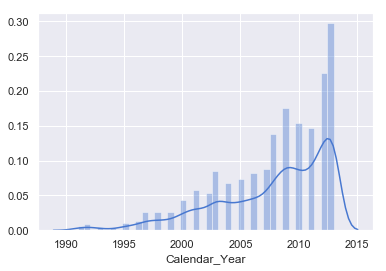

In [17]:
#Getting the normalized distribution over the years using kde
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(df["Calendar_Year"]);

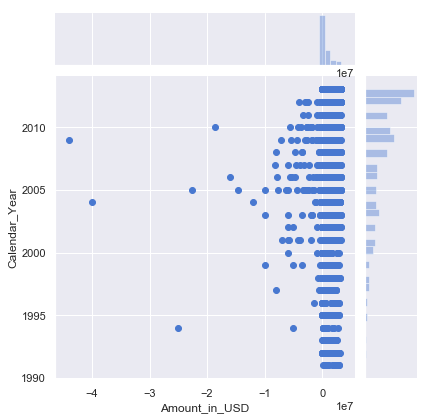

In [18]:
#Visualizing the money transactions by the Funds over the years
sns.jointplot(x='Amount_in_USD', y='Calendar_Year', data=df[df['Amount_in_USD'] < 3299637])

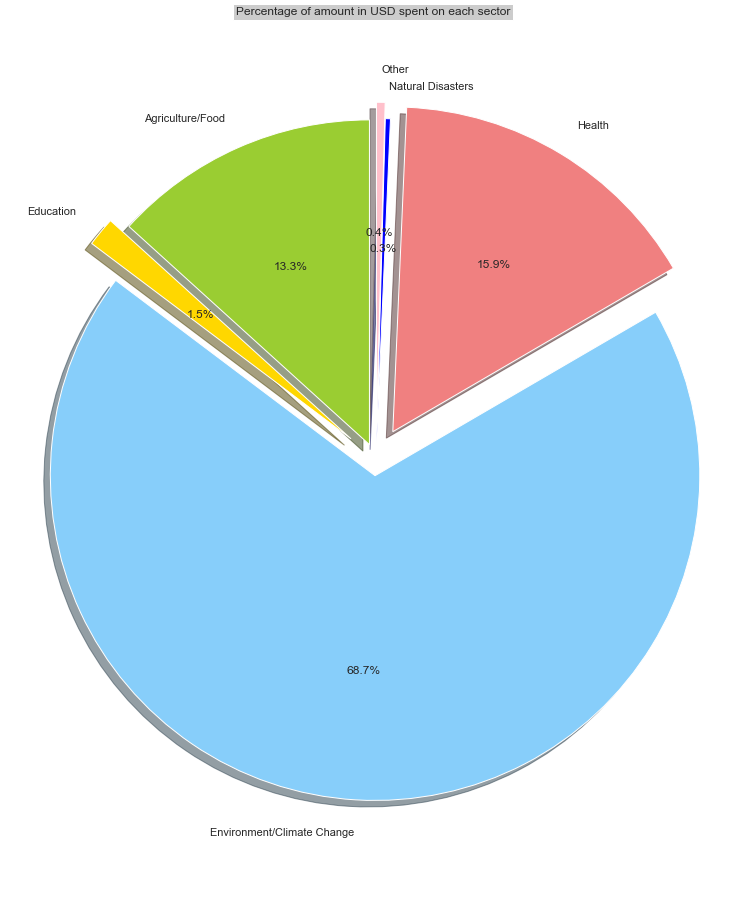

In [19]:
#Displaying the Percentage of amount spend per sector


fig = plt.figure(figsize=(20,12))
ax = fig.add_axes((0,0,.5,1))
ax.set_title('Percentage of amount in USD spent on each sector', 
             bbox={'facecolor':'0.8', 'pad':3})
labels = 'Agriculture/Food','Education','Environment/Climate Change','Health','Natural Disasters','Other'
sizes = [2141, 234, 11075, 2568, 41, 69]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'blue', 'pink']
explode = (0.05, 0.1, 0.05, 0.1, 0.05, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

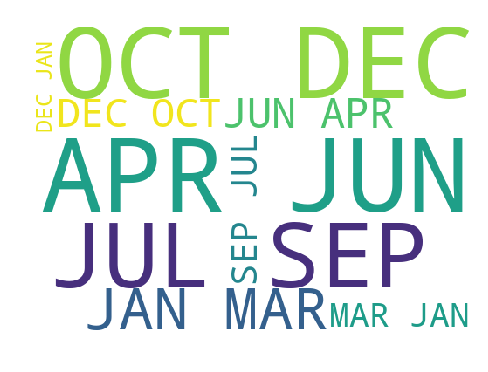

In [20]:
x = df.Approval_Quarter
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

In [21]:
df.dtypes #in order to find the type of the object.

As_of_Date              object
Fund_Name               object
Use_Code                object
Country_Beneficiary     object
Recipient               object
Sub_Account             object
Approval_Quarter        object
Calendar_Year            int64
Amount_in_USD          float64
Financial_Product       object
Sector_Theme            object
dtype: object

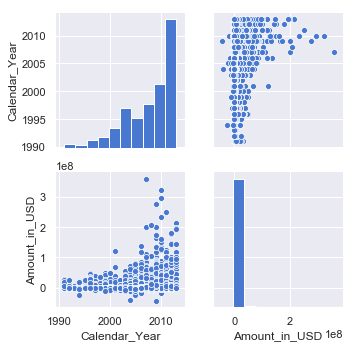

In [22]:
sns.pairplot(df) # in order to find relationship between multiple variables separately within subsets

In [23]:
def plot_corr(dataset,size=10): # in order to find the correlation between the Amount and the Year.
    corr=dataset.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.title('Financial Funding')

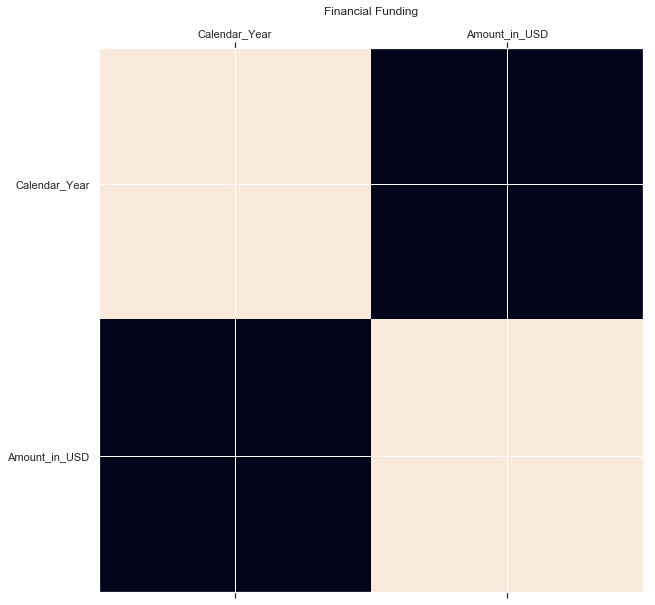

In [24]:
plot_corr(df)

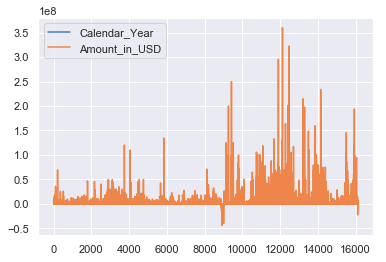

In [25]:
df.plot()
# line graph representation in order to show the variation between the funding as per the years.

In [27]:
df.std()
# to find the Standard Deviation of major target variables.

Calendar_Year    4.831227e+00
Amount_in_USD    1.190815e+07
dtype: float64

# Scatter Plots

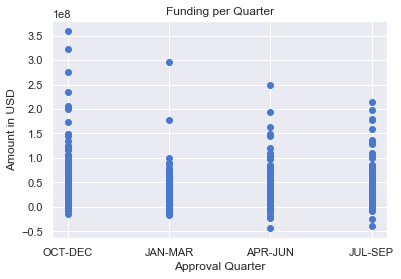

In [28]:
# Usage of Scatter in order to show the relation between the Approval Quater and Amount funded in USA.
fig, ax = plt.subplots()  
scatter_plot = ax.scatter(
df['Approval_Quarter'],
    df['Amount_in_USD']
)
ax.set_xlabel('Approval Quarter')
ax.set_ylabel('Amount in USD')
ax.set_title('Funding per Quarter')
plt.show()

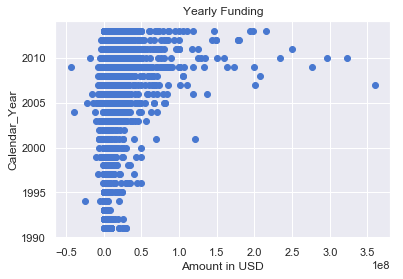

In [29]:
# to show the relationship between Amount and Year.
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df['Amount_in_USD'],
    df['Calendar_Year']
)
ax.set_xlabel('Amount in USD')
ax.set_ylabel('Calendar_Year')
ax.set_title('Yearly Funding')
plt.show()

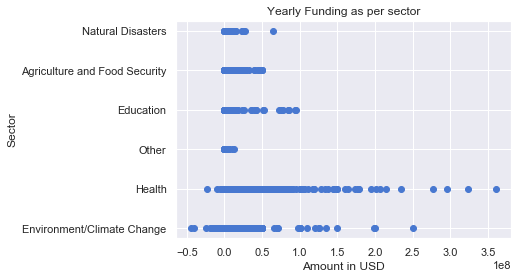

In [30]:
# Relation between sector/theme and amount.

# Analysis: It can be easily from the below visualization that most of the amount was funded towards the health sector.

fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df['Amount_in_USD'],
    df['Sector_Theme']
)
ax.set_xlabel('Amount in USD')
ax.set_ylabel('Sector')
ax.set_title('Yearly Funding as per sector')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208E74D9FD0>,
      dtype=object)

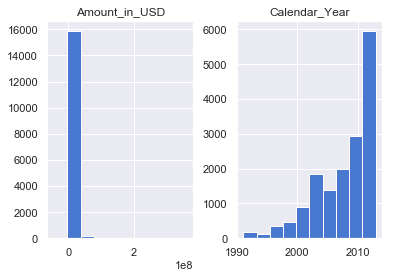

In [31]:
df.hist()  #Histogram representation interms of funding and it can be clearlyu stated that from 2010, there has been increment in the funding

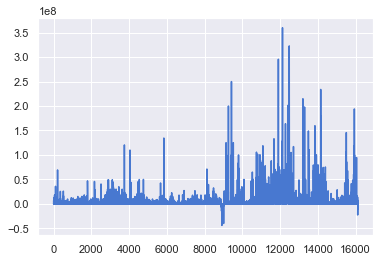

In [32]:
df['Amount_in_USD'].plot()

In [33]:
df.count()  # values count

As_of_Date             16128
Fund_Name              16128
Use_Code               16128
Country_Beneficiary     7544
Recipient              16128
Sub_Account            11988
Approval_Quarter       16128
Calendar_Year          16128
Amount_in_USD          16128
Financial_Product      16128
Sector_Theme           16128
dtype: int64

In [34]:
df.isnull().sum()/len(df)*100

As_of_Date              0.000000
Fund_Name               0.000000
Use_Code                0.000000
Country_Beneficiary    53.224206
Recipient               0.000000
Sub_Account            25.669643
Approval_Quarter        0.000000
Calendar_Year           0.000000
Amount_in_USD           0.000000
Financial_Product       0.000000
Sector_Theme            0.000000
dtype: float64

In [35]:
print(df.isnull().sum())

As_of_Date                0
Fund_Name                 0
Use_Code                  0
Country_Beneficiary    8584
Recipient                 0
Sub_Account            4140
Approval_Quarter          0
Calendar_Year             0
Amount_in_USD             0
Financial_Product         0
Sector_Theme              0
dtype: int64


In [36]:
df.isna().sum()

As_of_Date                0
Fund_Name                 0
Use_Code                  0
Country_Beneficiary    8584
Recipient                 0
Sub_Account            4140
Approval_Quarter          0
Calendar_Year             0
Amount_in_USD             0
Financial_Product         0
Sector_Theme              0
dtype: int64

In [38]:
import missingno as msno # Imported Library

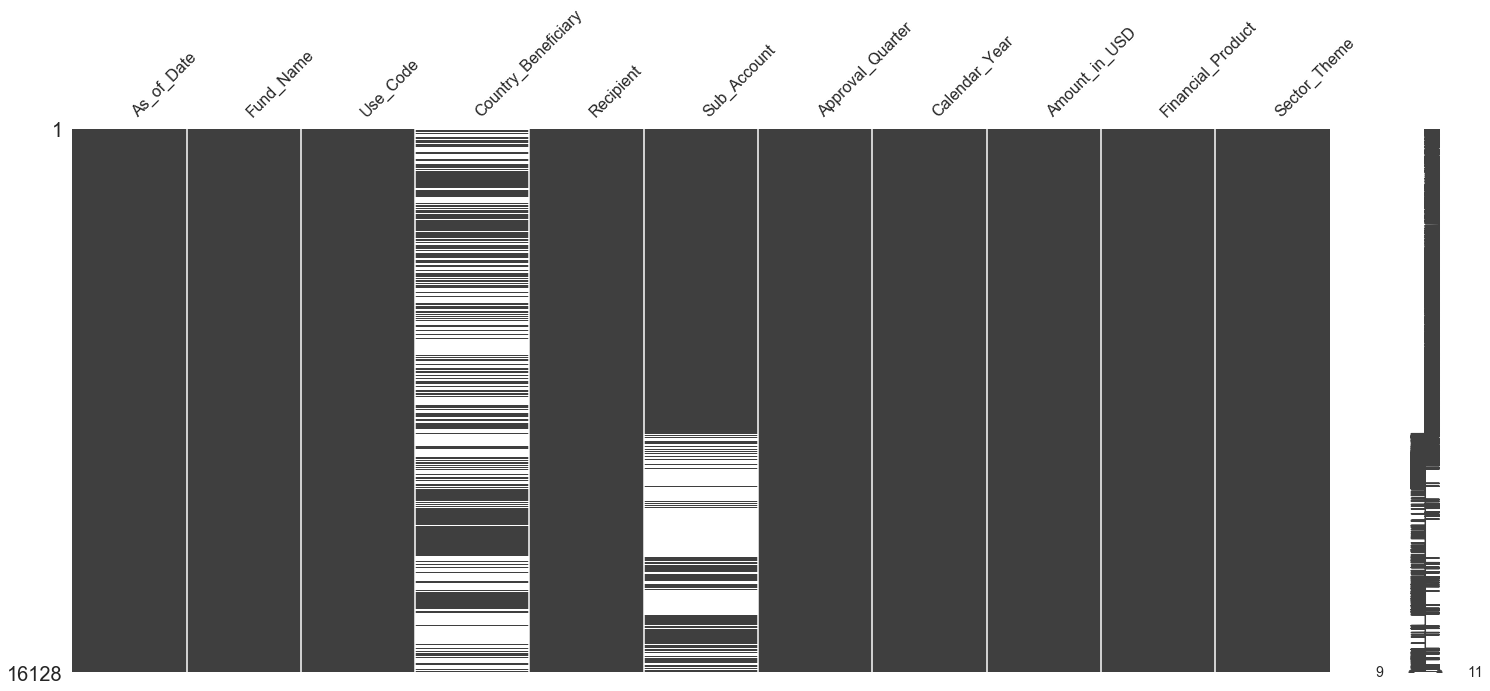

In [40]:
msno.matrix(df) # In order to find the missing values 
# Most of them are in Country_Beneficiary and Sub_Account

In [41]:
numeric_features = df.select_dtypes(include=[np.number])

numeric_features.columns

Index(['Calendar_Year', 'Amount_in_USD'], dtype='object')

In [42]:
categorical_features = df.select_dtypes(include=[np.object])

categorical_features.columns

Index(['As_of_Date', 'Fund_Name', 'Use_Code', 'Country_Beneficiary',
       'Recipient', 'Sub_Account', 'Approval_Quarter', 'Financial_Product',
       'Sector_Theme'],
      dtype='object')

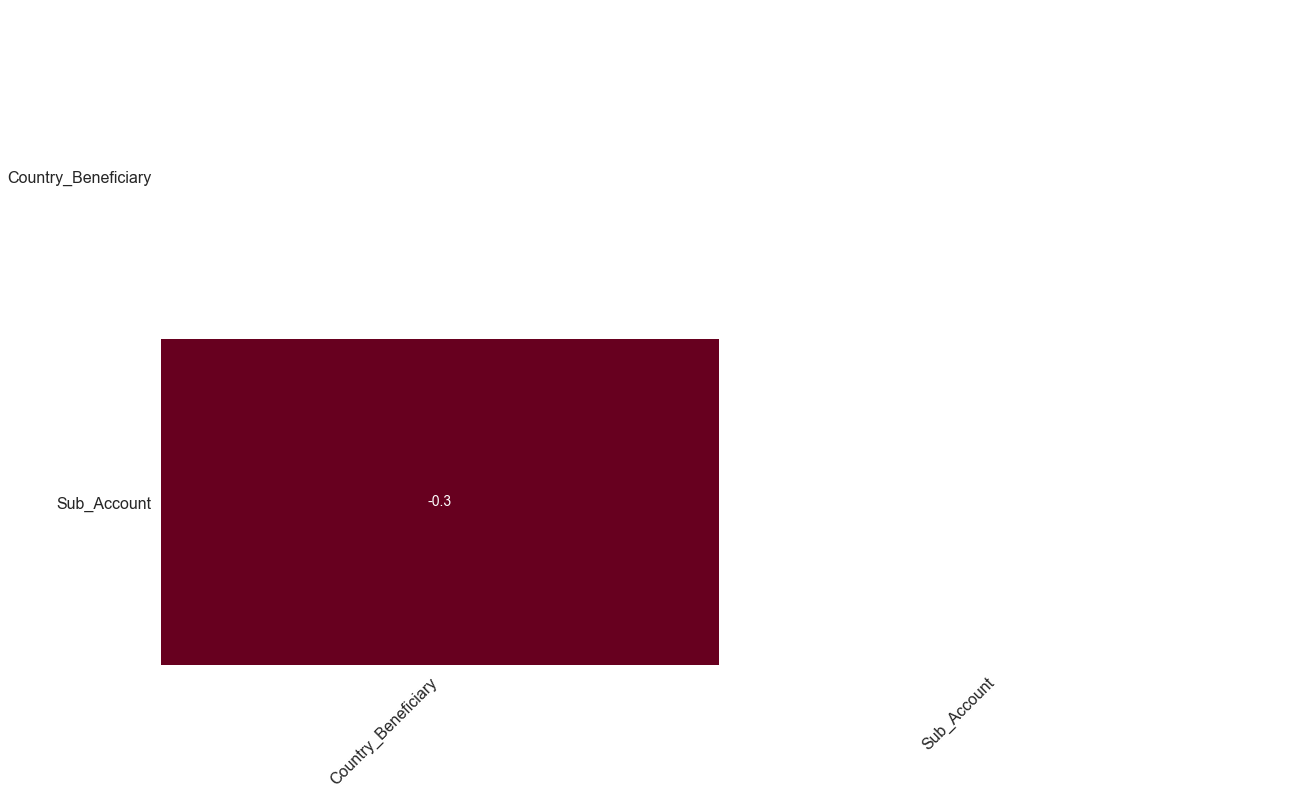

In [43]:
msno.heatmap(df)

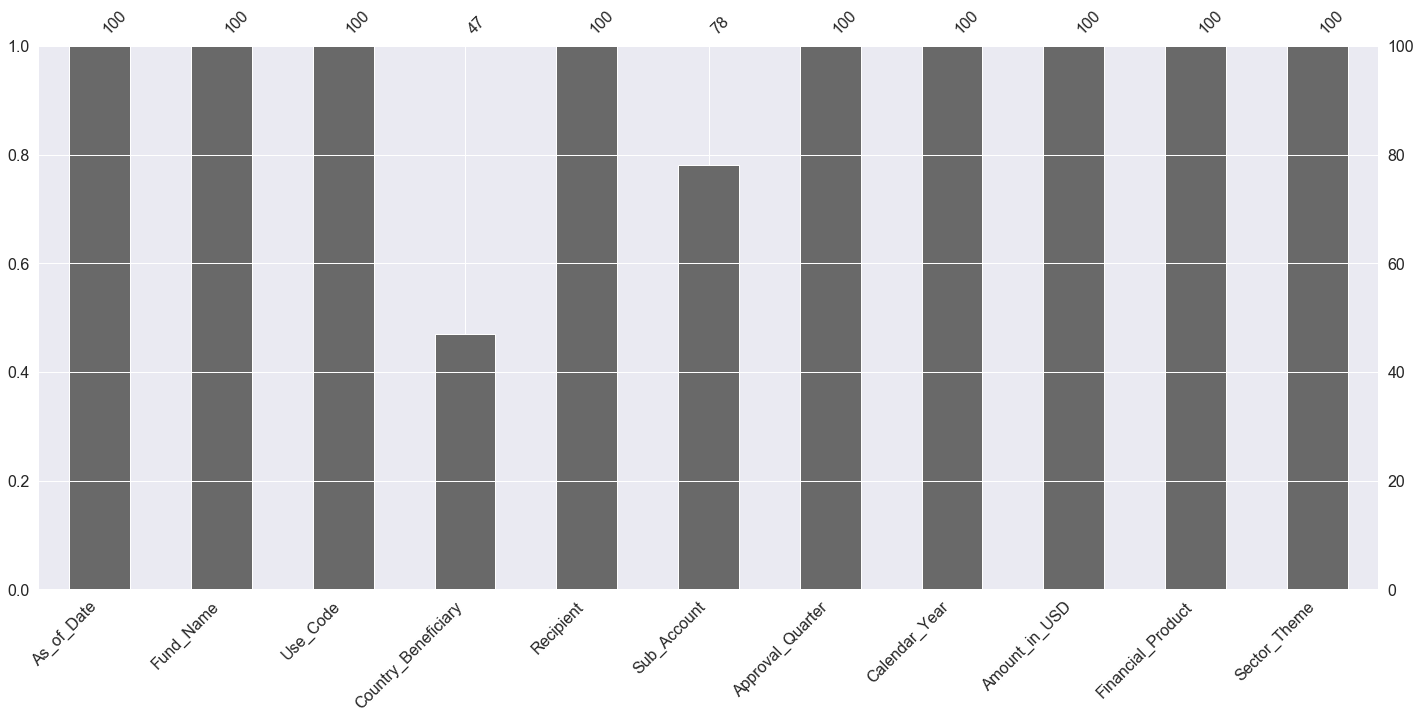

In [44]:
msno.bar(df.sample(100))

# Percentage of missing values in each feature of the data set

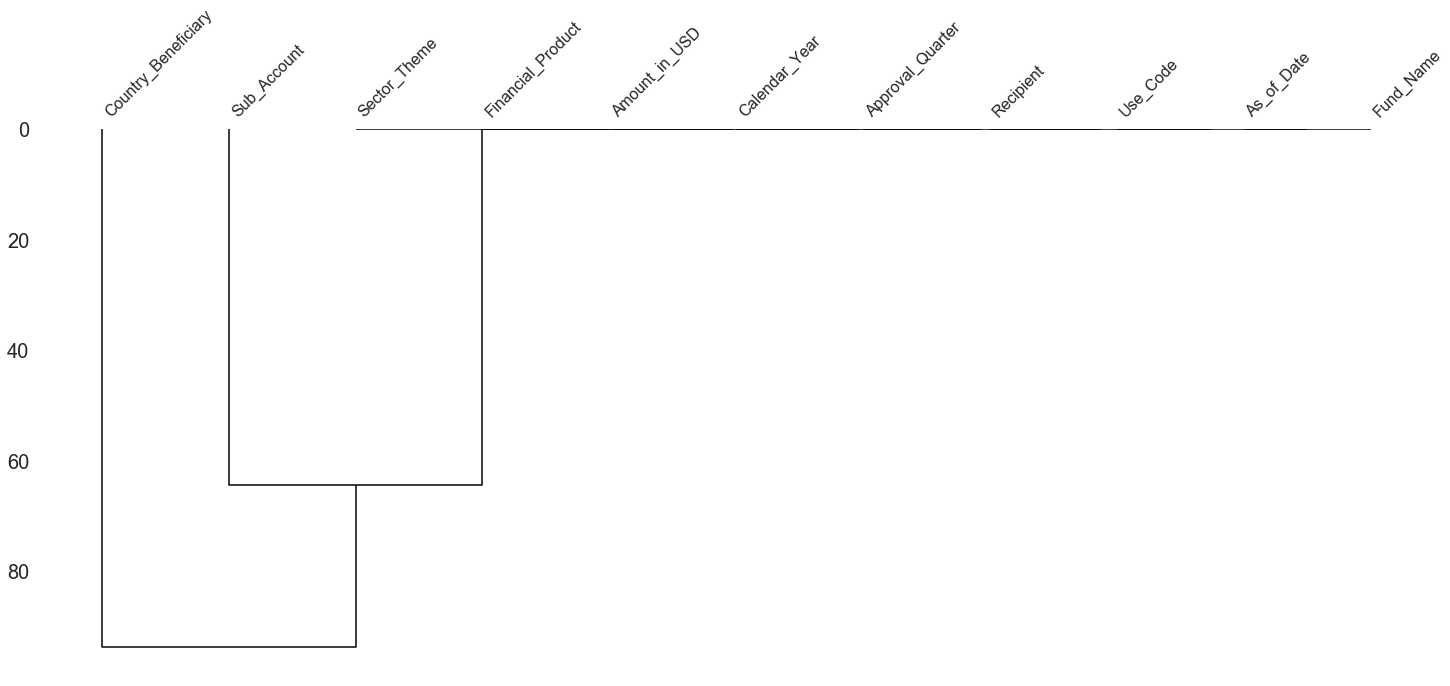

In [45]:
msno.dendrogram(df)

In [47]:
df['Amount_in_USD'].min(),df['Amount_in_USD'].max()
# Finding minimum and maximum amount in the dataset

(-44000000.0, 360009999.0)

In [48]:
df.corr()

,Calendar_Year,Amount_in_USD
Calendar_Year,1.00000,0.03338
Amount_in_USD,0.03338,1.00000
